In [1]:
#Importing the Libraries
import pandas as pd

from datetime import datetime

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
import sklearn as skl

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn import linear_model
%matplotlib inline

# from keras.models import Sequential
# from keras.layers import Dense
# import keras.backend as K
# from keras.callbacks import EarlyStopping
#from keras.optimizers import Adam
# from keras.models import load_model
# from keras.layers import LSTM
# from keras.utils.vis_utils import plot_model

In [66]:
#Get the Dataset
data_train=pd.read_csv("NewData/BAC2016_2022.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
data_train.sort_values(by="Date", ascending = False)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-18,35.619999,35.689999,34.599998,34.880001,34.880001,47396900
2022-05-17,35.619999,36.220001,35.430000,35.990002,35.990002,42635600
2022-05-16,35.000000,35.169998,34.410000,34.810001,34.810001,39076500
2022-05-13,35.529999,35.730000,34.759998,35.169998,35.169998,49069300
2022-05-12,35.009998,35.430000,34.259998,35.070000,35.070000,61231500
...,...,...,...,...,...,...
2017-01-09,22.510000,22.709999,22.400000,22.549999,20.265772,75901500
2017-01-06,22.780001,22.850000,22.559999,22.680000,20.382603,66281500
2017-01-05,22.820000,22.930000,22.350000,22.680000,20.382603,86826400


In [41]:
data_train.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [42]:
#Print the shape of Dataframe  and Check for Null Values
print("Dataframe Shape: ", data_train. shape)
print("Null Value Present: ", data_train.isnull().values.any())

Dataframe Shape:  (1354, 6)
Null Value Present:  False


In [46]:
# Use close price to Train the model

training_set = data_train.iloc[:,1:2].values
print(training_set)
print(training_set.shape)

[[22.68    ]
 [22.959999]
 [22.93    ]
 ...
 [35.169998]
 [36.220001]
 [35.689999]]
(1354, 1)


In [47]:
# Normalize the dataset (0,1): scale the dataset to be from 0 to 1: 

scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[0.09888305],
       [0.10808144],
       [0.10709592],
       ...,
       [0.50919834],
       [0.54369252],
       [0.52628116]])

In [48]:
# Create X_train and y_train data structure

X_train = []
y_train = []
for i in range(60,1354):
    X_train.append(scaled_training_set[i-60:i,0])
    y_train.append(scaled_training_set[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)


In [49]:
print(X_train)

[[0.09888305 0.10808144 0.10709592 ... 0.11103807 0.13140604 0.13074901]
 [0.10808144 0.10709592 0.1044678  ... 0.13140604 0.13074901 0.14159001]
 [0.10709592 0.1044678  0.09986856 ... 0.13074901 0.14159001 0.14126146]
 ...
 [0.90735874 0.88272011 0.86432323 ... 0.56668848 0.5177398  0.52759525]
 [0.88272011 0.86432323 0.86859396 ... 0.5177398  0.52759525 0.50919834]
 [0.86432323 0.86859396 0.78876476 ... 0.52759525 0.50919834 0.54369252]]


In [50]:
print(X_train.shape)
print(y_train.shape)

(1294, 60)
(1294,)


In [51]:
# Reshape the data

X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1294, 60, 1)

In [52]:
# by Importing the Crucial Libraries 

from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout

In [36]:
# Building the Model by Adding Different Layers to LSTM

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))


In [37]:
# Fit the Model

regressor.compile(optimizer='adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
41/41 [==============================] - 8s 67ms/step - loss: 0.0320
Epoch 2/100
41/41 [==============================] - 3s 70ms/step - loss: 0.0064
Epoch 3/100
41/41 [==============================] - 3s 79ms/step - loss: 0.0067
Epoch 4/100
41/41 [==============================] - 4s 107ms/step - loss: 0.0066
Epoch 5/100
41/41 [==============================] - 4s 90ms/step - loss: 0.0055
Epoch 6/100
41/41 [==============================] - 4s 102ms/step - loss: 0.0054
Epoch 7/100
41/41 [==============================] - 4s 92ms/step - loss: 0.0053
Epoch 8/100
41/41 [==============================] - 4s 97ms/step - loss: 0.0053
Epoch 9/100
41/41 [==============================] - 4s 87ms/step - loss: 0.0048
Epoch 10/100
41/41 [==============================] - 4s 93ms/step - loss: 0.0042
Epoch 11/100
41/41 [==============================] - 4s 94ms/step - loss: 0.0054
Epoch 12/100
41/41 [==============================] - 4s 99ms/step - loss: 0.0039
Epoch 13/100
41/41 [===

In [53]:
# Use the current close price as sample dataset for prediction

data_test = data_train
data_test


array([[20.247801],
       [20.625254],
       [20.382603],
       ...,
       [34.810001],
       [35.990002],
       [34.880001]])

In [54]:
# prepare the inputs for the prediction model

dataset_total = pd.concat((data_train['Open'], data_train['Close']), axis = 0)
inputs = dataset_total[len(dataset_total)-len(data_train)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

In [55]:
X_test = []
for x in range(60,80):
    X_test.append(inputs[x-60:x,0])
X_test = np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

In [57]:
predicted_prices = regressor.predict(X_test)
predicted_prices

array([[0.5169291 ],
       [0.3159221 ],
       [0.14281648],
       [0.0718516 ],
       [0.06725964],
       [0.07890184],
       [0.09295359],
       [0.10210103],
       [0.10289277],
       [0.1027471 ],
       [0.08944821],
       [0.08835991],
       [0.09255838],
       [0.09902154],
       [0.10283369],
       [0.11043498],
       [0.12248456],
       [0.13122039],
       [0.13325581],
       [0.12591574]], dtype=float32)

In [59]:
# List prices in the next 20 days: 
predicted_prices= scaler.inverse_transform(predicted_prices)
predicted_prices

array([[1097.408  ],
       [ 911.1562 ],
       [ 750.7576 ],
       [ 685.002  ],
       [ 680.74713],
       [ 691.5347 ],
       [ 704.555  ],
       [ 713.031  ],
       [ 713.7646 ],
       [ 713.6296 ],
       [ 701.30695],
       [ 700.2986 ],
       [ 704.18884],
       [ 710.17755],
       [ 713.7099 ],
       [ 720.7532 ],
       [ 731.9182 ],
       [ 740.01276],
       [ 741.8988 ],
       [ 735.09753]], dtype=float32)

In [62]:
len(predicted_prices)


20

In [67]:
# df in future 20days

pd.DataFrame({'Date': ['2022-05-19','2022-05-20','2022-05-21',
                        '2022-05-22','2022-05-22','2022-05-23'],
                     'Open Prices': {predicted_prices}
                     }
)

TypeError: unhashable type: 'numpy.ndarray'

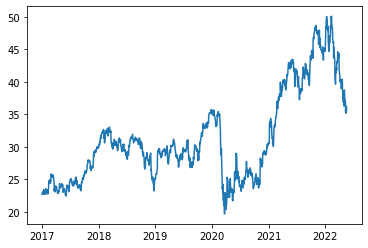

In [60]:
plt.plot(data_train.iloc[:,1])
plt.show()

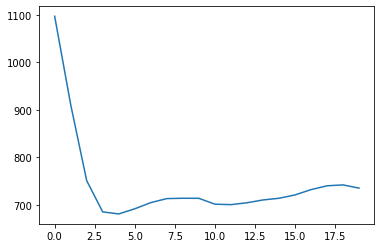

In [61]:
plt.plot(predicted_prices)
plt.show()